# Texture stimulus examples

To be able to run the examples in this notebook, you need to have pymer insalled and set up.

Also the conda environment (aka kernel) should be set to `pymer` (top right).

You can test if everything works as intended by trying to import the `OMB` class.

In [1]:
import pathadder
from omb import OMB

Let's start by loading the OMB stimulus from the experiment from `20180710`. The OMB stimulus was the 8th in line.

In [2]:
st = OMB('20180710', 8)

We can call up a summary of the units in this experiment. Note that the terms _unit_ , _cluster_ and _cell_ are used interchangably throughout the code base.

In [3]:
st.clusterstats()

There are 96 clusters in this experiment.
( 33.3%)   32 are rated 1.
( 65.6%)   63 are rated 2 or better.
( 86.5%)   83 are rated 3 or better.
(100.0%)   96 are rated 4 or better.


We can easily load the spike times from a single cell. 

In [4]:
st.read_raster(0)

array([1.64268000e+00, 1.65068000e+00, 2.10976000e+00, ...,
       1.97455104e+03, 1.97500244e+03, 1.97555540e+03])

We can visualize the spikes like so:

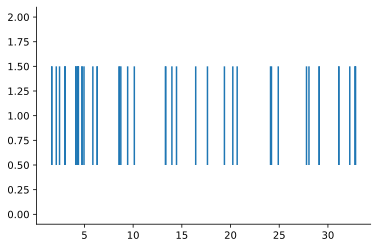

In [5]:
import matplotlib.pyplot as plt

plt.eventplot(st.read_raster(0)[:50])
plt.show()

Even more useful would be binned spikes, using the frame times information.


In [6]:
spikes = st.allspikes()
spikes.shape

(96, 54000)

There are 96 units in this experiment, and the stimulus was 54000 frames long.

Likewise, we can access the motion of the texture.

In [7]:
bgsteps = st.bgsteps
bgsteps.shape

(2, 54000)

The first row is the x coordinates, second is y. Values in each time bin corresponds to how much the texture moves in that time period.

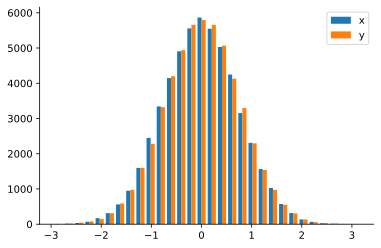

In [8]:
plt.hist(bgsteps.T, bins=30, label=['x', 'y'])
plt.legend()
plt.show()

To get an idea about the trajectory, we can plot it. Note that the trajectory is simply the cumulative sum of the motion steps.

In [9]:
bgtraj = st.bgtraj
bgtraj.shape

(2, 54000)

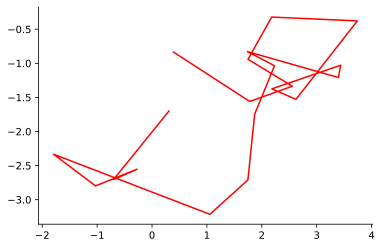

In [10]:
plt.plot(bgtraj[0, :20], bgtraj[1, :20], 'r-')
plt.show()

We can also visualize the texture that was used to generate the stimulus.

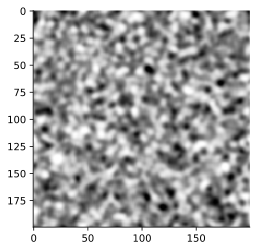

In [11]:
plt.imshow(st.texturebasic, cmap='Greys_r')
plt.show()

There is also a way of playing the stimulus as an animation for visualization purposes but this needs to be done with an interactive backend.

In [ ]:
%matplotlib qt # To switch back to non-interactive backend, use %matplotlib inline

In [ ]:
st.playstimulus(0, 100)

There are a few more attributes to make plotting, saving etc easier. You can check the following scripts for some examples:

```
ombtexturestas.py
cca/cca_withpyrcca.py
generalizedmodels/glm_omb_motion.py
```